In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np
from scipy import stats
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import episiming

## Criando o cenário do Rio com redução

In [3]:
tx_reducao = 500
landscan_file = '../../../../dados/RJ/cidade_rj/dados_estatisticos/LandScan.npy'
piramide_file = 'piramide_etaria_MRJ.csv'
escolas_file = 'municipais.npy'
cenario_rio = episiming.cenarios.RiodeJaneiro(tx_reducao, landscan_file, piramide_file, escolas_file)
print(f'População do cenário reduzido: {cenario_rio.num_pop}\n')

População do cenário reduzido: 13163



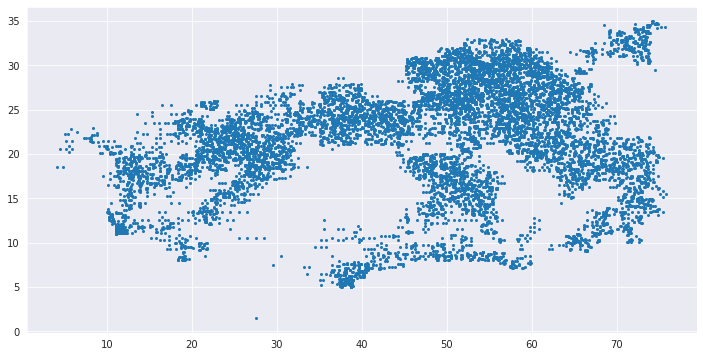

In [4]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(12,6))
plt.scatter(x, y, s=4)
plt.show()

## Carregando as informações de infectados por blocos

In [5]:
infect = np.load('infectados_total.npy')

In [7]:
new_infect = np.zeros(np.shape(infect))

In [6]:
bairros = np.load('geoloc_Bairros_MRJ.npy')

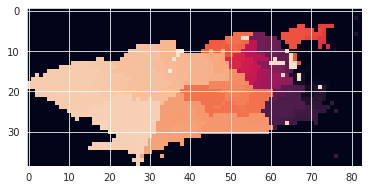

In [10]:
plt.imshow(bairros)

In [11]:
new_bairros = corrige_mtrx(bairros)

array([[68.5       , 72.375     , 72.70833333, ..., 38.83333333,
        38.84848485, 27.5       ],
       [34.5       , 34.375     , 34.875     , ...,  5.55506022,
         5.55506022,  1.5       ]])

In [53]:
to_plot

array([11454, 11468, 11726,  5818,  5837,  5838,  5839,  5840,  5841,
        5842,  5843,  6742,  6752,  6760,  6764,  6765,  6766,  4860,
        4882,  4892,  4893,  4894,  4895,  4896,  4897,  5830,  5832,
        5833, 11727, 11729, 11730, 11731, 11736, 11737, 11738, 11739,
       11740, 11741, 11742, 11743, 11757, 11758, 11759, 11760, 11761,
       11246, 11247, 11251, 11252, 11253, 11254, 11255, 11256, 11257,
       11261, 11262, 11270, 11271, 11272, 11273, 11274, 11275, 11276,
       11484, 11487, 11488, 11489, 11492, 11493, 11494, 11500, 11501,
       11502, 11506,  7537,  7540,  7541,  7542,  7543,  7544,  7545,
        7546,  7547,  8201,  8202,  8203,  2509,  2512,  2516,  2517,
        2522,  2523,  2524,  2525,  2526,  2527,  2541,  2542,  2547,
        2571,  2572,  2573,  2574,  2575,  2576,  2577,  2578,  3275,
        3284,  3285,  3290,  3292,  3293,  3294,  3295,  3302,  3305,
        3306,  3322,  3333,  3334,  3335,  3336,  3337,  3338,  5961,
        5964,  5965,

In [61]:
cenario_rio.pop_posicoes[infectados_0[1]][0]

52.19994617400542

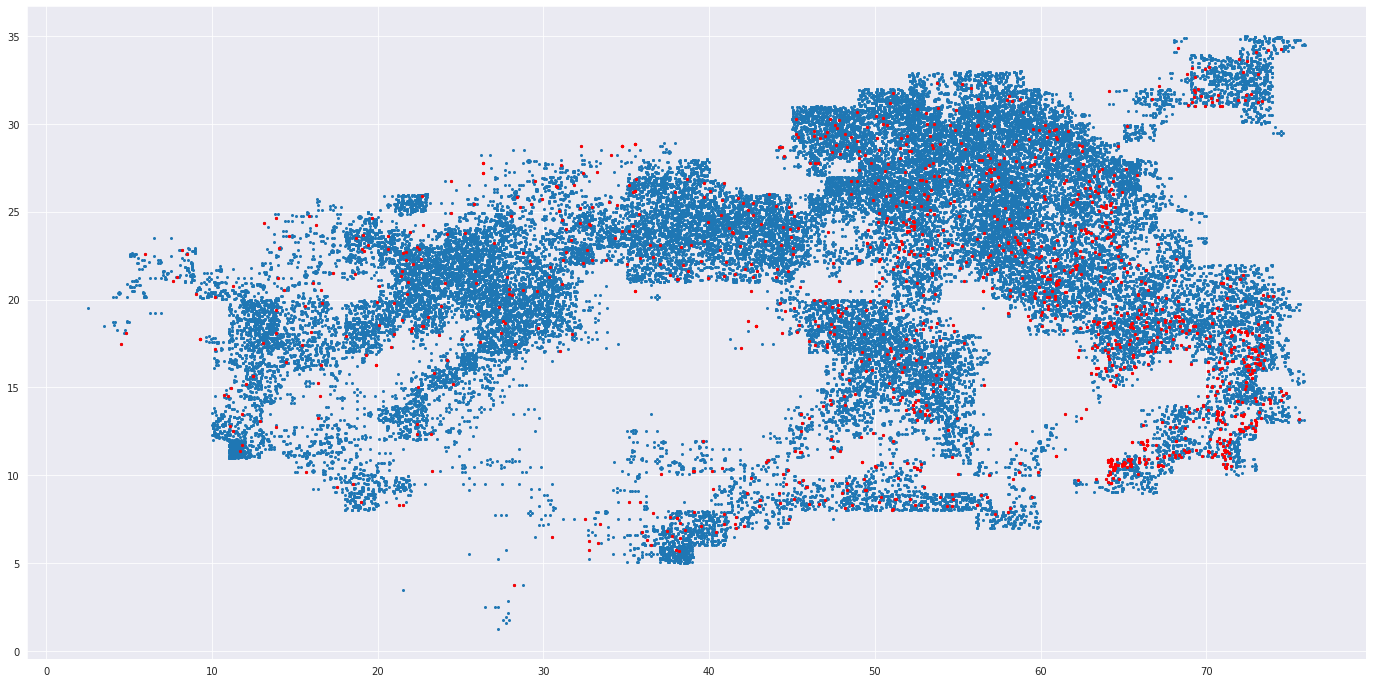

In [25]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(24,12))
plt.scatter(x, y, s=4)
# plt.scatter(x[6110],y[61,10], color = 'red')
# plt.imshow(mtrx_teste)
for i in range(len(infectados_0)):
    plt.scatter(cenario_rio.pop_posicoes[infectados_0[i]][0], cenario_rio.pop_posicoes[infectados_0[i]][1], s = 5, color = 'red')
# plt.imshow(new_bairros)
# plt.gca().invert_yaxis()
plt.show()

In [35]:
np.max(infect/tx_reducao)

1.44

In [37]:
np.min(np.nonzero(infect/tx_reducao))

0

In [48]:
np.sum(infect//tx_reducao)

7.0

In [47]:
infect[infect//tx_reducao != 0]

array([112., 112., 144., 136., 144., 104., 112.])

In [32]:
24*8

192

In [183]:
cenario_rio.pop_posicoes

array([[68.5       , 34.5       ],
       [72.375     , 34.375     ],
       [72.70833333, 34.875     ],
       ...,
       [38.83333333,  5.55506022],
       [38.84848485,  5.55506022],
       [27.5       ,  1.5       ]])

In [57]:
np.round(4.2)

4.0

In [149]:
mtrx_teste = np.zeros(np.shape(bairros))

In [170]:
mtrx_teste[37,5] = 5000

In [28]:
status = []
rng = np.arange(len(pos_indv_blocos))
for x in range(83):
    for y in range(39):
        checa_bloco_indv = pos_indv_blocos == [x,y]
        indv_nos_blocos = np.logical_and(checa_bloco_indv[:,0], checa_bloco_indv[:,1])
        indices_no_bloco = rng[indv_nos_blocos]
        id_bloco = bairros[y,x]
        if id_bloco == 0 and len(indices_no_bloco) > 0:
            status.append([x,y, indices_no_bloco])

In [175]:
cenario_rio.pop_posicoes[13083]

array([37.14705882,  5.26470588])

In [29]:
status

[[5, 23, array([31283, 31289, 31290, 31293, 31294, 31295, 31297, 31298])],
 [6, 23, array([31284])],
 [6, 24, array([26568])],
 [10,
  12,
  array([61035, 61036, 61038, 61039, 61042, 61046, 61050, 61051, 61053,
         61060, 61061, 61062, 61063, 61064, 61065, 61074, 61075, 61088,
         61089, 61090, 61094, 61095, 61096, 61097, 61098, 61099, 61129,
         61130, 61131, 61132, 61133, 61134, 61135, 61136, 61137, 61138])],
 [10,
  13,
  array([59640, 59641, 59644, 59646, 59648, 59649, 59650, 59653, 59654,
         61040, 61049, 61056, 61058, 61059, 61070, 61071, 61076, 61077,
         61082, 61083, 61084, 61085, 61086, 61087, 61109, 61110, 61111,
         61112, 61139, 61140, 61141, 61142, 61143, 61144, 61145, 61146])],
 [11,
  11,
  array([62076, 62077, 62079, 62092, 62093, 62098, 62105, 62107, 62110,
         62114, 62117, 62118, 62130, 62141, 62147, 62150, 62155, 62157,
         62159, 62161, 62162, 62167, 62173, 62180, 62182, 62184, 62185,
         62186, 62187, 62188, 62189, 62

In [30]:
len(np.hstack([s[2] for s in status]))

10739

In [31]:
cenario_rio.num_pop

67973

In [122]:
pos_indv_blocos = np.round(cenario_rio.pop_posicoes)

In [123]:
pos_indv_blocos

array([[68., 34.],
       [72., 34.],
       [73., 35.],
       ...,
       [39.,  6.],
       [39.,  6.],
       [28.,  2.]])

In [111]:
mtrx_infectados_reduzida = reducao_infectados(tx_reducao, infect)

In [112]:
np.sum(mtrx_infectados_reduzida)

84.0

In [45]:
mtrx_infectados_reduzida = np.round(infect/tx_reducao)

In [46]:
np.sum(mtrx_infectados_reduzida)

0.0

In [36]:
np.sum(infect),np.sum(infect)/tx_reducao

(12168.0, 24.336)

Usando numpy

In [16]:
infect = []
rng = np.arange(len(pos_indv_blocos))
for x in range(83):
    for y in range(39):
        checa_bloco_indv = pos_indv_blocos == [x,y]
        indv_nos_blocos = np.logical_and(checa_bloco_indv[:,0], checa_bloco_indv[:,1])
        indices_no_bloco = rng[indv_nos_blocos]
        qt_bloco = mtrx_infectados_reduzida[y,x]
        if qt_bloco == 0:
            if pessoa_esta_em_bairro
            
        if (qt_bloco > 0) & (len(indices_no_bloco) > 0):
            indv_infect = np.random.choice(indices_no_bloco, int(qt_bloco))
            for e in indv_infect:
                infect.append(e)

List Comprehension

In [82]:
# %%timeit
# for x in range(83):
#     for y in range(39):
#         check_pos = pos_blocos == [x,y]
#         verifica = [p[0] & p[1] for p in check_pos]
#         indices = rng[verifica]
#         qt = new_infect2[y,x]
#         if (qt > 0) & (len(indices) > 0):
#             escolhas = np.random.choice(indices, int(qt))
#             for e in escolhas:
#                 cenario_rio.G_r.nodes[e]['estado'] = 2

11.4 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
len(infect)

397

In [61]:
# np.sum(np.hstack(teste2))

86625703

In [62]:
# np.sum(np.hstack(teste))

86625703

In [21]:
infectados = np.array([v for i,v in nx.get_node_attributes(cenario_rio.G_r,'estado').items()])

In [24]:
infectados

array([1, 2, 1, ..., 1, 1, 1])

In [28]:
num_infectados_0 = 500
num_pop = 10000

In [29]:
pop_estado_0 = np.ones(num_pop)
infectados_0 = np.random.choice(num_pop,num_infectados_0, replace=False)
pop_estado_0[infectados_0] = 2*np.ones(num_infectados_0)
attr_estado_0 = dict([(i, {'estado': int(pop_estado_0[i])}) for i in range(num_pop)])


In [34]:
cenario_rio.pop_posicoes[cenario_rio.pop_posicoes < [50,30]]

array([49.07142857, 49.64285714, 49.64285714, ...,  5.83757816,
       27.5       ,  1.5       ])

In [56]:
cenario_rio.num_pop

67973

In [66]:
3e3 * .2

600.0

In [71]:
np.sum(infect)*7/tx_reducao

851.76

In [80]:
851.76*0.00236686

2.0159966736

In [81]:
np.sort(infect[infect != 0]*7/(500))[::-1]

array([2.016, 2.016, 1.904, 1.568, 1.568, 1.568, 1.456, 1.344, 1.344,
       1.232, 1.232, 1.232, 1.232, 1.12 , 1.12 , 1.008, 1.008, 0.896,
       0.784, 0.784, 0.784, 0.784, 0.672, 0.672, 0.672, 0.672, 0.672,
       0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.672, 0.56 , 0.56 ,
       0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 ,
       0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 , 0.56 ,
       0.56 , 0.56 , 0.56 , 0.448, 0.448, 0.448, 0.448, 0.448, 0.448,
       0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448,
       0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448,
       0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448,
       0.448, 0.448, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336,
       0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336,
       0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336,
       0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336, 0.336,
       0.336, 0.336,

In [6]:
def reducao_infectados(tx_reducao, mtrx_infectados):
    mtrx_reduzida = mtrx_infectados//(tx_reducao/15)
    return mtrx_reduzida

def corrige_mtrx(mtrx):
        new_mtrx = np.zeros(np.shape(mtrx))
        for i in range(39):
            new_mtrx[np.abs(i-38)] = mtrx[i]
        return new_mtrx

def distribuicao_inicial_infectados(tx_reducao, mtrx_infectados, mtrx_bairros, pop_posicoes):
    mtrx_infectados = corrige_mtrx(mtrx_infectados)
    mtrx_bairros = corrige_mtrx(mtrx_bairros)

    pos_indv_blocos = np.round(pop_posicoes)
    mtrx_infectados_reduzida = mtrx_infectados#reducao_infectados(tx_reducao, mtrx_infectados)

    infect = []
    rng = np.arange(len(pos_indv_blocos))
    for x in range(83):
        for y in range(39):
            checa_bloco_indv = pos_indv_blocos == [x,y]
            indv_nos_blocos =  np.logical_and(checa_bloco_indv[:,0], checa_bloco_indv[:,1])
            indices_no_bloco = rng[indv_nos_blocos]
            qt_bloco = mtrx_infectados_reduzida[y,x]                  
            if (qt_bloco > 0) & (len(indices_no_bloco) > 0):
                indv_infect = np.random.choice(indices_no_bloco, int(qt_bloco))
                for e in indv_infect:
                    infect.append(e)
    return infect

In [7]:
def reducao_mtrx(tx_reducao, mtrx):
    if tx_reducao == 1:
        mtrx_reduzida = mtrx
    else:
        qt_total = np.rint(np.sum(mtrx)/tx_reducao)
        rng_blocos = np.arange(np.prod(np.shape(mtrx)))
        pesos = (mtrx/np.sum(mtrx)).flatten()
        escolha = np.array(random.choices(rng_blocos, pesos, k = int(qt_total)))

        rows = np.floor(escolha/83)
        cols = np.mod(escolha,83)
        mtrx_reduzida = np.zeros((39,83))
        for i,j in zip(rows,cols):
            mtrx_reduzida[int(i)][j] += 1
    return mtrx_reduzida

def corrige_mtrx(mtrx):
        new_mtrx = np.zeros(np.shape(mtrx))
        for i in range(39):
            new_mtrx[np.abs(i-38)] = mtrx[i]
        return new_mtrx

def distribuicao_inicial_casos(tx_reducao, mtrx_casos, mtrx_bairros, pop_posicoes):
    mtrx_casos = corrige_mtrx(mtrx_casos)
    mtrx_bairros = corrige_mtrx(mtrx_bairros)

    pos_indv_blocos = np.round(pop_posicoes)
    mtrx_casos_reduzida = reducao_mtrx(tx_reducao, mtrx_casos)

    casos = []
    rng = np.arange(len(pos_indv_blocos))
    for x in range(83):
        for y in range(39):
            checa_bloco_indv = pos_indv_blocos == [x,y]
            indv_nos_blocos =  np.logical_and(checa_bloco_indv[:,0], checa_bloco_indv[:,1])
            indices_no_bloco = rng[indv_nos_blocos]
            qt_bloco = mtrx_casos_reduzida[y,x]                  
            if (qt_bloco > 0) & (len(indices_no_bloco) > 0):
                indv_casos = np.random.choice(indices_no_bloco, int(qt_bloco))
                for e in indv_casos:
                    casos.append(e)
    return casos

In [14]:
# mtrx_infectados = corrige_mtrx(infect)
# mtrx_bairros = corrige_mtrx(bairros)

# pos_indv_blocos = np.round(cenario_rio.pop_posicoes)
# mtrx_infectados_reduzida = reducao_infectados(tx_reducao, mtrx_infectados)

NameError: name 'reducao_infectados' is not defined

In [8]:
np.rint(np.sum(8*infect)/tx_reducao)

195.0

In [10]:
infectados_0 = distribuicao_inicial_casos(tx_reducao, 8*infect, bairros, cenario_rio.pop_posicoes)

In [12]:
len(infectados_0)

166

In [17]:
rd = reducao_mtrx(tx_reducao, 8*infect)

In [18]:
rd[rd != 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       2., 1., 1., 3., 1., 3., 2., 1., 1., 1., 1., 1., 1., 3., 2., 1., 3.,
       2., 2., 2., 1., 1., 2., 6., 2., 1., 1., 1., 1., 1., 1.])

In [36]:
new_infect = corrige_mtrx(infect)

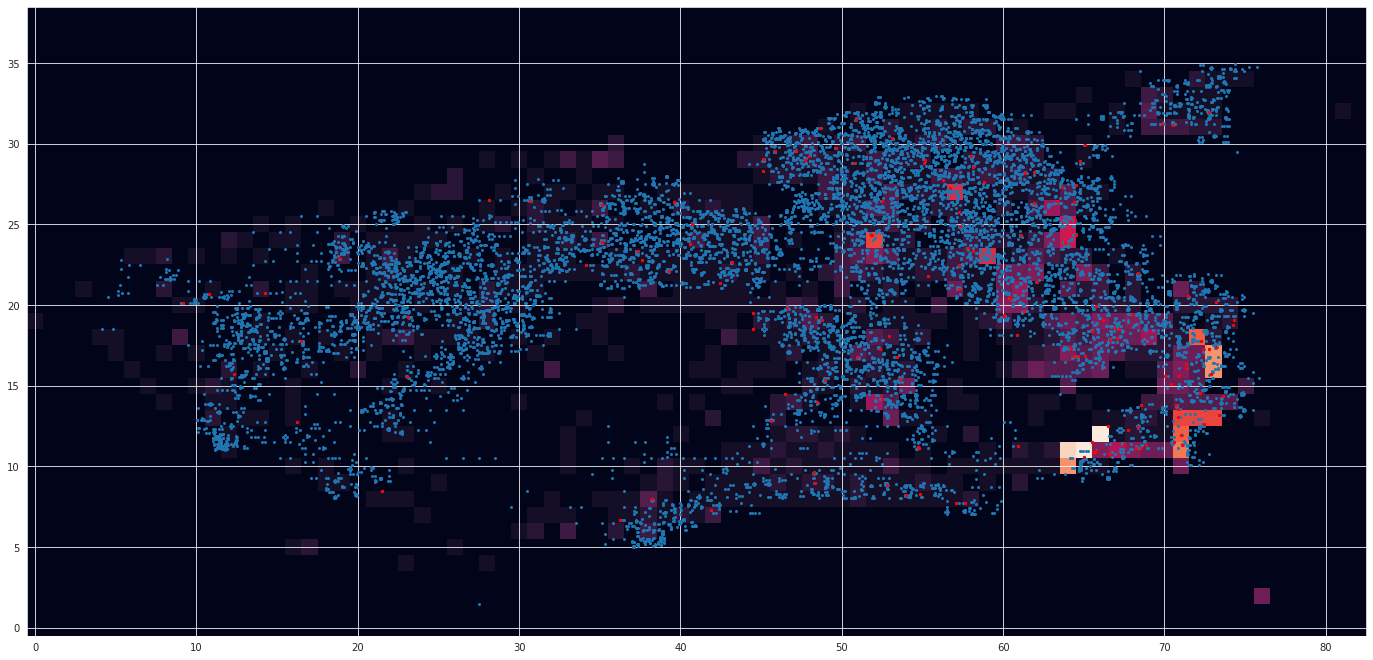

In [42]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(24,12))
plt.scatter(x, y, s=4)
# plt.scatter(x[6110],y[61,10], color = 'red')
# plt.imshow(mtrx_teste)
for i in range(len(infectados_0)):
    plt.scatter(cenario_rio.pop_posicoes[infectados_0[i]][0], cenario_rio.pop_posicoes[infectados_0[i]][1], s = 5, color = 'red')
plt.imshow(new_infect)
plt.gca().invert_yaxis()
plt.show()

In [69]:
qt_infect

122.0

In [46]:
qt_infect_rdz = np.rint(qt_infect/tx_reducao)

In [49]:
qt_infect_rdz

122.0

In [59]:
mtrx = np.ceil(infect//tx_reducao)

In [60]:
np.sum(mtrx)

7.0

In [ ]:
wei = infect/np.sum(infect)

In [50]:
lst = wei * qt_infect_rdz

In [52]:
np.sum(lst[lst != 0])

122.00000000000001

In [22]:
wei_lst = np.hstack(wei)

In [30]:
qt_infect = np.sum(infect)

In [33]:
import random

In [35]:
random.choices(rng, wei_lst, k = qt_infect)

ValueError: The number of weights does not match the population

In [23]:
col = len(wei_lst)//83

In [24]:
row = len(wei_lst)%39

In [26]:
col

39

In [29]:
infectados_0

[11468,
 5840,
 4893,
 4882,
 11743,
 11254,
 7540,
 3293,
 3302,
 6863,
 6866,
 8242,
 8264,
 6917,
 8279,
 8292,
 7630,
 6930,
 5126,
 3456,
 12599,
 12422,
 12420,
 12408,
 12413,
 12408,
 12408,
 10955,
 9094,
 5130,
 6061,
 4295,
 4295,
 12433,
 12433,
 12432,
 12435,
 7700,
 12428,
 12259,
 12006,
 12259,
 12006,
 10982,
 10514,
 10499,
 9125,
 12458,
 9866,
 9864,
 12274,
 10541,
 9905,
 12280,
 9928,
 12298,
 11303,
 12478,
 12325,
 12303,
 12470,
 12312,
 12330,
 11836,
 12030,
 11540,
 10986,
 10996,
 8423,
 12034,
 12034,
 10601,
 10600,
 9995,
 12049,
 12047,
 11032,
 11015,
 11009,
 10607,
 10606,
 10608]

In [41]:
attr_estado_0 = dict([(i, {'estado': int(pop_estado_0[i])})for i in range(60000)])

In [118]:
397/763

0.5203145478374837

In [119]:
51/84

0.6071428571428571